# RSS NEWS FEED VERTICAL SEARCH ENGINE

The goal here is to build a vertical search engine from an RSS feed. The vertical search engine would be built using three process which are: Crawling, Indexing and Query Processing. There are some other processes involved in building a vertical search engine like link analysis, ranking, tokenizing, etc. But we will be focusing on the three mentioned to build a simple vertical search engine.  

Before we get into building it, here are some technical terms and theor definitions.
- Vertical Search Engine: This is basically a search engine which focuses in a certain area specifically.
- RSS feed: it is a type of web feed which allows users and applications to access updates to websites in a standardized, computer-readable format.(Wikipedia)
- Crawling (Web crawling): a software robot that crawls, traverses, parses and downloads pages on the web.
- Indexing: It is defined as a data structure technique which allows you to quickly retrieve records from a database file. It is based on the same attributes on which the Indices has been done. An index. Takes a search key as input. Efficiently returns a collection of matching records.
- Query processing: It is a translation of high-level queries into low-level expression. It is a step wise process that can be used at the physical level of the file system, query optimization and actual execution of the query to get the result. It requires the basic concepts of relational algebra and file structure.


We are dealing with RSS feeds which are updated whenever there is a news update, considering this; it means we are dealing with huge sums of documents or data. Due to the ever changing or updating nature of our dataset, automation of the crawler is important. 
First, we crawl for one rss feed then we automate the crawler for more RSS feeds
- Yahoo: https://www.yahoo.com/news/world/rss
- Google: https://news.google.com/rss?hl=en-US&gl=US&ceid=US:en&x=1571747254.2933
- BBC: http://feeds.bbci.co.uk/news/world/rss.xml
- The Guardian: https://www.theguardian.com/world/rss
- Al Jazeeera: http://www.aljazeera.com/xml/rss/all.xml
- Buzzfeed: https://www.buzzfeed.com/world.xml
- Washington Post: http://feeds.washingtonpost.com/rss/world
- New York Times:https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml

## A. Crawler

Before we crawl from websites, it is important to check the websites you're crawling from to see what you're allowed to crawl and what you're not allowed to crawl from the website. 
You can see this information by adding '/robots.txt'to the website links you're crawling from.

In [237]:
import feedparser
import pandas as pd
'''The 'Feedparser' package is a python module for 
downloading and parsing syndicated feeds. It can handle various RSS, Atom 
and CDF feeds''' 

"The 'Feedparser' package is a python module for \ndownloading and parsing syndicated feeds. It can handle various RSS, Atom \nand CDF feeds"

In [238]:
LINK = "https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml"
feed = feedparser.parse(LINK)

feed_len = len(feed.entries) #This extracts the number of news in feed
old_news = 0  # This shows the count of news in the RSS feed that is already scraped

print("There are {} news in the RSS feed." .format(feed_len))

There are 10 news in the RSS feed.


We find the number of news articles currently on the RSS feed as we are crawling and also the number of news articles that has been previously scraped due to a previous iteration of the crawler. This will help us to automatically adjust the frequency with which crawling would be carried out to scrape the link(s) for new information or news article updates.

In [239]:
final_data = pd.read_csv("articles.csv", index_col = 'Unnamed: 0')
#final_data = pd.DataFrame(columns=['ID', 'Title', 'Summary', 'Link', 'Published'])
final_data.head()

,ID,Title,Summary,Link,Published
0,1,New Strawberry-Flavored H.I.V. Drugs for Babie...,Thousands of infants are doomed to early death...,https://www.nytimes.com/2019/11/29/health/AIDS...,29/11/2019
1,2,Iraq Prime Minister Says He Will Resign Amid P...,The announcement comes after demonstrators set...,https://www.nytimes.com/2019/11/29/world/middl...,29/11/2019
2,3,"Brad Gobright, Renowned Rock Climber, Is Dead ...","The American free solo climber, one of the wor...",https://www.nytimes.com/2019/11/29/world/ameri...,29/11/2019
3,4,"Afghanistan, Black Friday, Pete Buttigieg: You...",Here's what you need to know.,https://www.nytimes.com/2019/11/29/briefing/af...,29/11/2019
4,5,"Warming Waters, Moving Fish: How Climate Chang...",Ocean temperatures are on the rise and warming...,https://www.nytimes.com/2019/11/29/climate/cli...,29/11/2019


After crawling from the RSS feed, we see that we have 36 news articles. With this, the information from this RSS feed is in a semi-structured format, we can save the 36 entries in a dataframe under titles which we will later use. We create a dataframe which saves the information crawled under the titles 'ID', 'Title', 'Link', 'Summary' and 'Published'(Date article was published).
We then store the document as a .csv file 
*NB: Comment out the data saving part.

In [240]:
def article_entry(entry, ID):
  ID = ID
  Title = entry.title
  Summary = entry.summary
  Link = entry.link
  Published = str(entry.published_parsed.tm_mday) + '/' + \
              str(entry.published_parsed.tm_mon) + '/' + \
              str(entry.published_parsed.tm_year)
  return [ID, Title, Summary, Link, Published]

Now we create a function that will accept entries from the feed and then parse it to the list with title, link and date published. A unique ID is then assigned to the entry which also denotes when the entry was scraped and entered to our vertical search engine.
We then test it on one entry from the feed.

In [241]:
test_entry = feed.entries[0]
article_entry(test_entry, 1)

[1,
 'The Best Movies and TV Shows New on Netflix Canada in December',
 'New additions include “Marriage Story,” “All the Money in the World" and “The Witcher.”',
 'https://www.nytimes.com/2019/11/29/world/canada/Netflix-Canada-December.html',
 '29/11/2019']

With the output above, we see that the title for the article in the RSS feed is given along with a summary, link and the date it was published.

In [242]:
data = [] #This creates a dataframe for saving the entries
n = len(final_data)+1 #This shows the ID value based on the highest ID value in database
for i in range(len(feed.entries)):
  entry = feed.entries[i]
  
  #check that link isn't in the database yet
  if entry.link not in final_data['Link'].values:
    processed = article_entry(entry = entry, ID=n)
    data.append(processed)
    n += 1 #increase the ID value
  else: old_news += 1 #count already scraped entries

After it works for one article, we apply it to the whole dataset with the documents.

In [243]:
if len(data) > 0:
  #transform data to pandas DataFrame
  news_extracted = pd.DataFrame(data, columns=['ID', 'Title', 'Summary', 'Link', 'Published'])

  #add new news to the database
  final_data = pd.concat([final_data, news_extracted], axis = 0)

  #write database to a csv file
  final_data.to_csv("articles.csv")

Wrap this in function for use in the URL for loop. Database is path to articles.csv file

In [244]:
def crawl(Link, articles):
  feed = feedparser.parse(Link)
  final_data = pd.read_csv('articles.csv', index_col="Unnamed: 0")
  data = [] #This creates a dataframe for saving the entries
  n = len(final_data)+1 #This shows the ID value based on the highest ID value in database
  for i in range(len(feed.entries)):
    entry = feed.entries[i]
    
    #check that link isn't in the database yet
    if entry.link not in final_data['Link'].values:
      processed = article_entry(entry = entry, ID=n)
      data.append(processed)
      n += 1 #increase the ID value
  if len(data) > 0:
    #transform data to pandas DataFrame
    news_extracted = pd.DataFrame(data, columns=['ID', 'Title', 'Summary', 'Link', 'Published'])

    #add new news to the database
    final_data = pd.concat([final_data, news_extracted], axis = 0)

    #write database to a csv file
    final_data.to_csv("articles.csv")

    return news_extracted
  else: 
    return []

In [245]:
final_data.head(5)

,ID,Title,Summary,Link,Published
0,1,New Strawberry-Flavored H.I.V. Drugs for Babie...,Thousands of infants are doomed to early death...,https://www.nytimes.com/2019/11/29/health/AIDS...,29/11/2019
1,2,Iraq Prime Minister Says He Will Resign Amid P...,The announcement comes after demonstrators set...,https://www.nytimes.com/2019/11/29/world/middl...,29/11/2019
2,3,"Brad Gobright, Renowned Rock Climber, Is Dead ...","The American free solo climber, one of the wor...",https://www.nytimes.com/2019/11/29/world/ameri...,29/11/2019
3,4,"Afghanistan, Black Friday, Pete Buttigieg: You...",Here's what you need to know.,https://www.nytimes.com/2019/11/29/briefing/af...,29/11/2019
4,5,"Warming Waters, Moving Fish: How Climate Chang...",Ocean temperatures are on the rise and warming...,https://www.nytimes.com/2019/11/29/climate/cli...,29/11/2019


In [246]:
final_data.tail(5)

,ID,Title,Summary,Link,Published
4,282,Thanksgiving mall hours 2019: When do N.J. mal...,"<ol><li><a href=""https://news.google.com/__i/r...",https://news.google.com/__i/rss/rd/articles/CB...,28/11/2019
5,283,This $1349 HP laptop is now just $499 on Black...,"<ol><li><a href=""https://news.google.com/__i/r...",https://news.google.com/__i/rss/rd/articles/CB...,29/11/2019
6,284,CDC to send experts to Samoa as death toll fro...,"<ol><li><a href=""https://news.google.com/__i/r...",https://news.google.com/__i/rss/rd/articles/CB...,27/11/2019
0,285,The Best Movies and TV Shows New on Netflix Ca...,"New additions include “Marriage Story,” “All t...",https://www.nytimes.com/2019/11/29/world/canad...,29/11/2019
1,286,Sudan Overturns Moral Policing Law and Disband...,The announcements by the country’s transitiona...,https://www.nytimes.com/2019/11/29/world/afric...,29/11/2019


In [247]:
print("{} % of article entries have already scraped." .format((old_news/feed_len)*100))

100.0 % of article entries have already scraped.


## B. Indexing

Indexing is what happens after crawling, large sums of text data is presented after crawling and an indexer acts as a storage for the data, however because we retrieve large sums of data, there is a catch. 
We use the index to create an inverted index for our data. Indexing of this nature requires us to build a system that only loads a portion of the raw corpus in memory at one time. 
This also means when running the queries on our indexed files, we want to ensure that the search engine can return the necessary term statistics fast enough for a usable vertical search engine.
An inverted index is the main data structure used in search engines because it allows for quick looking of documents that contain any given term in the query.
The relevant data structure include the lexicon or dictionary which is a lookup table of term specific information such as document frequency and where in the posting file to access the per-document term frequency (TF). 
The data structure also include the mapping from any integer ID to a list of document ID and frequency information of the term in those documents.
For the dictionary or lexicon our indexer is supposed to create, we need to prepare the data in a way where we only save the texts that carries some informational weigh for our articles. This requires us to perform some text preprocessing methods which include, removing punctuations, removing apostrophes, removing stopwords, transforming all texts to lower cases and lemmatisation. Reason for using lemmatisation instead of stemming is discussed later.

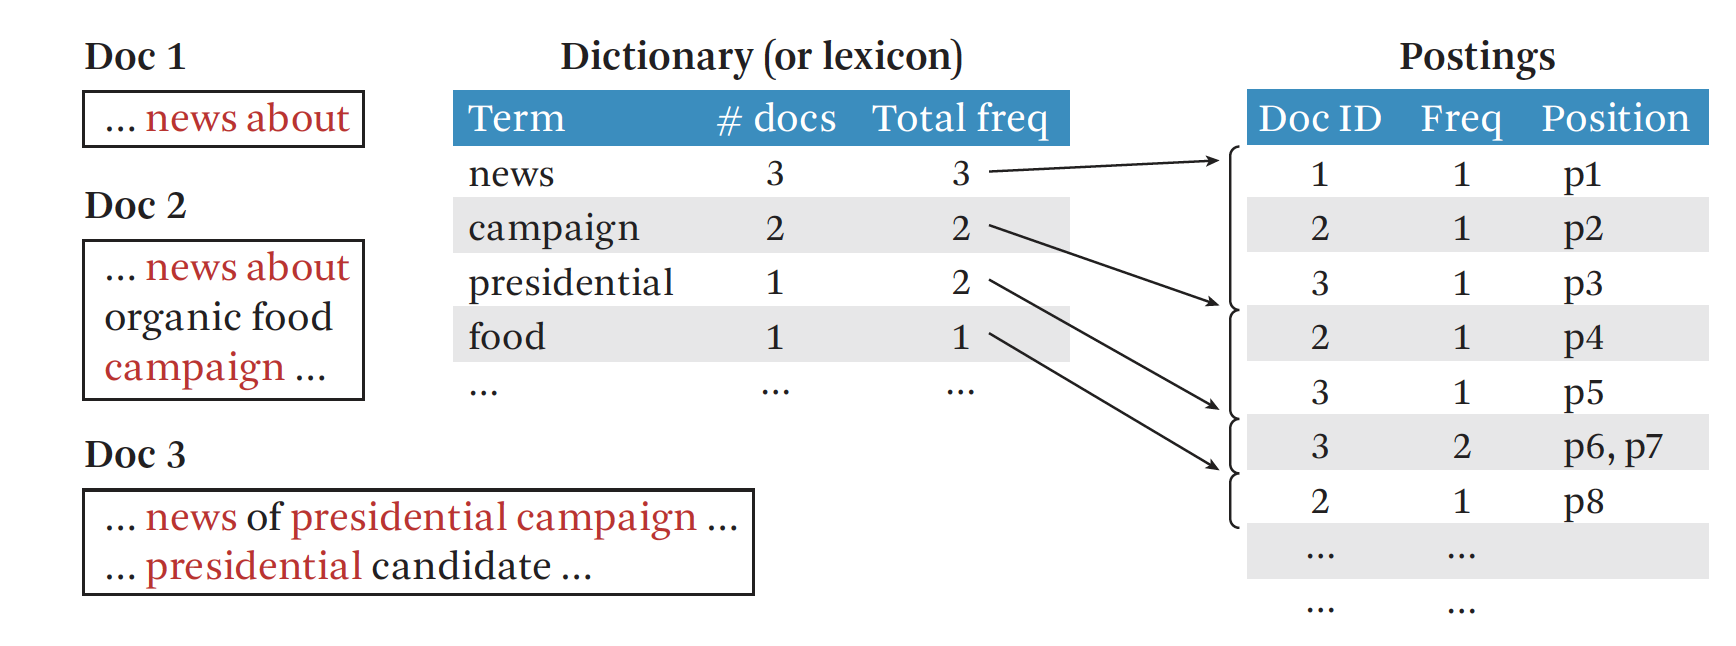

In [255]:
#Importing ntlk packages
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
import string

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/qab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/qab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/qab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/qab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [260]:
final_data = final_data.reset_index(drop = True)

In [261]:
entry = final_data.loc[0,:].copy()

In [262]:
entry

ID                                                           1
Title        New Strawberry-Flavored H.I.V. Drugs for Babie...
Summary      Thousands of infants are doomed to early death...
Link         https://www.nytimes.com/2019/11/29/health/AIDS...
Published                                           29/11/2019
Name: 0, dtype: object

Again, we will implement the following processes for one entry and then iterate later for all our data. 

## Text Preprocessing

TRANFORMING TEXTS TO LOWERCASES AND REMOVING APOSTROPHES
- During this stage the sentences in the article is parsed into tokens. As human beings, we can always learn or adapt to knowing that 'They' and 'they' belong to the same token, but due to programming languages and computers being sensitive to text data because of character encoding, 'They' and 'they' will be highlighted as different. This means with our text data, we have to convert every text to lowercase to help with our indexing accuracy. We remove apostrophes too so when removing stopwords later on, words like 'dont' can be removed since "dont" is a stopword but the program won't recognise "don't" as a stopword

In [263]:
def article_string(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

PUNCTUATION:
- Care is taken when dealing with removing punctuation from our texts. There are times periods(.) would be used to separate abbreviations and when removed, the abbreviations spell a word and here, we wouldn't want our preprocessing to create new words for our text data. It'll contaminate our data. Example: U.S. having it's period striped will be 'us' after preprocessing.

In [264]:
article_string(entry.Summary)

'thousands of infants are doomed to early deaths each year in part because pediatric medicines come in hard pills or bitter syrups that need refrigeration'

LEMMATISATION
- Lemmatisation is used to reduce words to its root synonym. When stemming, the words need not to be a dictionary word, it just removes the prefix and suffix and this might hurt the quality of our query search. When you lemmatize, you will be getting a dictionary word. For example: 'Studyies' when you stem this word, you will get 'studi' as the output but when you lemmatize, it will be returned to its root which is 'study' and this helps in giving a more informational value to our indexing.

In [265]:
def find_wordnet_point(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [266]:
print ("Camelo: {}\n Swimming: {}\n Angry: {}".format(find_wordnet_point("camelo"), find_wordnet_point("swimming"), find_wordnet_point("angry")))

Camelo: n
 Swimming: v
 Angry: a


STOPWORDS:
    In these text documents, it's common knowledge that these articles would have a lot of stopwords in them, this will increase the term frequencies for the stopwords such as 'is' etc. When the weights of these word/tokens are high., it renders querying inefficient in multiple ways. Furthermore, removing stopwords boosts computation and space efficiency.
    The ntlk libraryhas a way of downloading the stopwords so you don't have to mention or state the stopwords you want to remove by yourself which helps save time and cost. The library iterates over all the documents and removes the stopwords

In [267]:
stop_words = stopwords.words("english")

In [268]:
lem = WordNetLemmatizer()

def stop_lemmatize(doc):
    tokens = nltk.word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in stop_words:
            tmp += lem.lemmatize(w, find_wordnet_point(w)) + " "
    return tmp

In [269]:
stop_lemmatize(doc = entry.Title)

'New Strawberry-Flavored H.I.V . Drugs Babies Are Offered $ 1 Day '

In [270]:
def article_string(text):
  text = text.lower() #to lowercase
  text = text.translate(str.maketrans('', '', string.punctuation)) #strip punctuation
  text = stop_lemmatize(text)
  return text

In [271]:
%time article_string(entry.Title)

CPU times: user 2.12 ms, sys: 1.23 ms, total: 3.35 ms
Wall time: 2.45 ms


'new strawberryflavored hiv drug baby offer 1 day '

In [272]:
final_processed = final_data.copy()

In [273]:
def change_df(df):
  df['Title'] = df['Title'].apply(article_string)
  df['Summary'] = df['Summary'].apply(article_string)

In [274]:
%time change_df(final_processed)

CPU times: user 3.33 s, sys: 385 ms, total: 3.71 s
Wall time: 3.71 s


In [275]:
final_processed.head(10)

,ID,Title,Summary,Link,Published
0,1,new strawberryflavored hiv drug baby offer 1 day,thousand infant doom early death year part ped...,https://www.nytimes.com/2019/11/29/health/AIDS...,29/11/2019
1,2,iraq prime minister say resign amid protest,announcement come demonstrator set fire irania...,https://www.nytimes.com/2019/11/29/world/middl...,29/11/2019
2,3,brad gobright renowned rock climber dead fall ...,american free solo climber one world ’ best fe...,https://www.nytimes.com/2019/11/29/world/ameri...,29/11/2019
3,4,afghanistan black friday pete buttigieg friday...,here need know,https://www.nytimes.com/2019/11/29/briefing/af...,29/11/2019
4,5,warm water move fish climate change reshape ic...,ocean temperature rise warm water cause fish s...,https://www.nytimes.com/2019/11/29/climate/cli...,29/11/2019
5,6,news quiz richard spencer uber thanksgiving,stay uptodate week,https://www.nytimes.com/interactive/2019/11/29...,29/11/2019
6,7,espionage interference australia grapple china...,talk australia week china revelation businessm...,https://www.nytimes.com/2019/11/29/world/austr...,29/11/2019
7,8,maltese businessman accuses top government off...,yorgen fenech arrest connection kill promise s...,https://www.nytimes.com/2019/11/28/world/europ...,28/11/2019
8,9,ice sculpture steal show uk climate debate bor...,melt block sculpt ice stood miss prime ministe...,https://www.nytimes.com/2019/11/28/world/europ...,28/11/2019
9,10,love conquers italy ’ parliament least one day,surprise move italian lawmaker propose girlfri...,https://www.nytimes.com/2019/11/28/world/europ...,28/11/2019


In [276]:
final_processed['text'] = final_processed['Title'] + " " + final_processed['Summary']
drop_cols = ['Title', 'Summary', 'Published', 'Link']
final_processed = final_processed.drop(drop_cols, axis=1)

We then apply it to our table

In [277]:
final_processed.head(10)

,ID,text
0,1,new strawberryflavored hiv drug baby offer 1 d...
1,2,iraq prime minister say resign amid protest a...
2,3,brad gobright renowned rock climber dead fall ...
3,4,afghanistan black friday pete buttigieg friday...
4,5,warm water move fish climate change reshape ic...
5,6,news quiz richard spencer uber thanksgiving s...
6,7,espionage interference australia grapple china...
7,8,maltese businessman accuses top government off...
8,9,ice sculpture steal show uk climate debate bor...
9,10,love conquers italy ’ parliament least one day...


In [278]:
def change_df(df):
  df = df
  df['Title'] = df['Title'].apply(article_string)
  df['Summary'] = df['Summary'].apply(article_string)
  df['text'] = df['Title'] + " " + df['Summary']
  drop_cols = ['Title', 'Summary', 'Published', 'Link']
  df = df.drop(drop_cols, axis=1)
  return df

## Build Index

In [279]:
entry = final_processed.loc[0,:].copy()
print(entry)
index_test = {}

ID                                                      1
text    new strawberryflavored hiv drug baby offer 1 d...
Name: 0, dtype: object


In [280]:
words = entry.text.split()
ID = entry.ID

In [281]:
word = words[0]
sample = {word: [ID]}
print(sample)

{'new': [1]}


In [282]:
for word in words:
  if word in index_test.keys():
    if ID not in index_test[word]:
      index_test[word].append(ID)
  else:
    index_test[word] = [ID]

In [283]:
print(index_test)

{'new': [1], 'strawberryflavored': [1], 'hiv': [1], 'drug': [1], 'baby': [1], 'offer': [1], '1': [1], 'day': [1], 'thousand': [1], 'infant': [1], 'doom': [1], 'early': [1], 'death': [1], 'year': [1], 'part': [1], 'pediatric': [1], 'medicine': [1], 'come': [1], 'hard': [1], 'pill': [1], 'bitter': [1], 'syrup': [1], 'need': [1], 'refrigeration': [1]}


In [284]:
def index_it(entry, index):
  words = entry.text.split()
  ID = int(entry.ID)
  for word in words:
    if word in index.keys():
      if ID not in index[word]:
        index[word].append(ID)
    else:
      index[word] = [ID]
  return index

In [285]:
ind = index_it(entry=entry, index= {})
print(ind)

{'new': [1], 'strawberryflavored': [1], 'hiv': [1], 'drug': [1], 'baby': [1], 'offer': [1], '1': [1], 'day': [1], 'thousand': [1], 'infant': [1], 'doom': [1], 'early': [1], 'death': [1], 'year': [1], 'part': [1], 'pediatric': [1], 'medicine': [1], 'come': [1], 'hard': [1], 'pill': [1], 'bitter': [1], 'syrup': [1], 'need': [1], 'refrigeration': [1]}


In [286]:
def index_all(df, index):
  for i in range(len(df)):
    entry = df.loc[i,:]
    index = index_it(entry = entry, index = index)
  return index

In [287]:
index = index_all(final_processed, index = {})
len(index)

6932

In [288]:
def build_index(df, index):
    to_add = change_df(df)
    index = index_all(df = to_add, index = index)
    return index

In [289]:
idx = build_index(df = final_data, index = {})

In [290]:
len(idx)

6932

In [291]:
import json

with open('index.json', 'w') as fp:
    json.dump(idx, fp, sort_keys=True, indent=4)

In [292]:
with open('index.json', 'r') as f:
    data = json.load(f)

In [293]:
def build_index_better(df, index_path):
  if len(df) > 0:
    with open(index_path, 'r') as f:
      old_index = json.load(f)
    updated_index = build_index(df = df, index = old_index)
    with open(index_path, 'w') as fp:
      json.dump(updated_index, fp, sort_keys=True, indent=4)
  else:
    print("Nothing to update")

## Ranked Retrieval

Lets take this example, when you google search how to fix a software problem with your computer we mostly expect our result to be from articles that are not outdated and have some credibility. Basically, when searching for something in a pool of information like on google, we expect the most relevant pages to show upn first. 
We have an always updating news feed and when someone wants to search for news that is no longer on the news feed or is 'old news', we need our search engine to be able to retrieve that information for our user. To be able to do this, we need to store some information about the scraped documents that could be used for such queries.
The package 'word2vec' can help us with the above mentioned.

In [294]:
import gensim
import numpy as np
#!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

We load the word2vec model

In [296]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [297]:
print(words)

['new', 'strawberryflavored', 'hiv', 'drug', 'baby', 'offer', '1', 'day', 'thousand', 'infant', 'doom', 'early', 'death', 'year', 'part', 'pediatric', 'medicine', 'come', 'hard', 'pill', 'bitter', 'syrup', 'need', 'refrigeration']


In [298]:
def average_vectors(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.vocab]
    if len(doc) == 0:
      return np.zeros(300)
    else:
      return np.mean(word2vec_model[doc], axis=0)

In [299]:
%time test_vec = average_vectors(word2vec, words)

CPU times: user 1.12 ms, sys: 5.33 ms, total: 6.45 ms
Wall time: 14.2 ms


In [300]:
def prepare_ranking(df):
  corpus = df[['ID', 'text']].copy()
  doc_vecs = {}
  for i in range(len(corpus)):
    row = corpus.loc[i,:]
    text = row.text.split()
    doc_vecs[row.ID]=average_vectors(word2vec, text)
  doc_vecs = pd.DataFrame.from_dict(data=doc_vecs, orient="index")
  doc_vecs['ID'] = doc_vecs.index
  return doc_vecs

In [301]:
doc_vecs = prepare_ranking(df=final_data)

In [302]:
doc_vecs.to_csv("vectors.csv")

def build_index_better(df, index_path):
  if len(df) > 0:
    with open(index_path, 'r') as f:
      old_index = json.load(f)
    updated_index = build_index(df = df, index = old_index)
    with open(index_path, 'w') as fp:
      json.dump(updated_index, fp, sort_keys=True, indent=4)
    df = change_df(df)
    vecs = prepare_ranking(df)
    vecs.columns = vecs.columns.astype("str")
    
    old_vecs = pd.read_csv("vectors.csv", index_col = "Unnamed: 0")
    new_vecs = pd.concat([old_vecs, vecs], axis = 0)
    new_vecs.to_csv("vectors.csv")
  else:
    print("Nothing to update")

In [304]:
data = pd.read_csv("articles.csv", index_col="Unnamed: 0")
data = data.reset_index(drop = True)
build_index_better(data, "index.json")

In [305]:
df = change_df(data)
vecs = prepare_ranking(df)

In [306]:
vecs.columns

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
        291,  292,  293,  294,  295,  296,  297,  298,  299, 'ID'],
      dtype='object', length=301)

# Query Processing

In [307]:
test = "New Strawberry Flavored Drugs Babies Offered"

In [308]:
print("User query: {}." .format(test))
test_norm = article_string(test)
print("Normalized query: {}." .format(test_norm))

User query: New Strawberry Flavored Drugs Babies Offered.
Normalized query: new strawberry flavor drug baby offer .


In [309]:
test_split = test_norm.split()

In [310]:
def article_query(query):
    norm = article_string(query)
    return norm.split()

### Retrieve from the index

In [311]:
retrieved = []
for word in test_split:
  if word in index.keys():
    retrieved.append(index[word])

In [312]:
def lists_intersection(lists):
  intersect = list(set.intersection(*map(set, lists)))
  intersect.sort()
  return intersect

In [313]:
result = lists_intersection(retrieved)
print(result)

[1]


In [314]:
def search_vengine(query, index=idx):
  query_split = article_query(query)
  retrieved = []
  for word in query_split:
    if word in index.keys():
      retrieved.append(index[word])
  if len(retrieved)>0:
    result = lists_intersection(retrieved)
  else:
      result = [0]
  return result

In [315]:
result_IDs = search_vengine("Love", index)
print(result_IDs)

[10, 12, 27, 50, 232, 244]


In [316]:
#in real setting we'll read the database from file here
final = pd.read_csv("articles.csv")

#this is our database
final = final_data.drop(['text'], axis=1).copy()
final.head(5)

,ID,Title,Summary,Link,Published
0,1,new strawberryflavored hiv drug baby offer 1 day,thousand infant doom early death year part ped...,https://www.nytimes.com/2019/11/29/health/AIDS...,29/11/2019
1,2,iraq prime minister say resign amid protest,announcement come demonstrator set fire irania...,https://www.nytimes.com/2019/11/29/world/middl...,29/11/2019
2,3,brad gobright renowned rock climber dead fall ...,american free solo climber one world ’ best fe...,https://www.nytimes.com/2019/11/29/world/ameri...,29/11/2019
3,4,afghanistan black friday pete buttigieg friday...,here need know,https://www.nytimes.com/2019/11/29/briefing/af...,29/11/2019
4,5,warm water move fish climate change reshape ic...,ocean temperature rise warm water cause fish s...,https://www.nytimes.com/2019/11/29/climate/cli...,29/11/2019


In [317]:
def connect_id_df(retrieved_id, df):
    return df[df.ID.isin(retrieved_id)].reset_index(drop=True)

In [318]:
result_final = connect_id_df(result_IDs, final)
result_final.head(5)

,ID,Title,Summary,Link,Published
0,10,love conquers italy ’ parliament least one day,surprise move italian lawmaker propose girlfri...,https://www.nytimes.com/2019/11/28/world/europ...,28/11/2019
1,12,johnson return london police shoot man uk vote,pa hrefhttpsnewsyahoocomjohnsonwarnsagainstcom...,https://news.yahoo.com/johnson-warns-against-c...,29/11/2019
2,27,uk pm johnson implores trump please avoid elec...,pa hrefhttpsnewsyahoocomukpmjohnsonimplorestru...,https://news.yahoo.com/uk-pm-johnson-implores-...,29/11/2019
3,50,johnson say ’ u trade deal include nh,pa hrefhttpsnewsyahoocomjohnsonpollleadpilesmi...,https://news.yahoo.com/johnson-poll-lead-piles...,28/11/2019
4,232,family watch murder love one become tabloid fo...,h1tarang chawla shellshocked learn sister niki...,https://www.buzzfeed.com/ginarushton/murder-ge...,7/11/2019


### Ranked Retrieval

In [319]:
query_vec = average_vectors(word2vec, test_split)

In [320]:
result_vecs = connect_id_df(result_IDs, doc_vecs)

In [321]:
def cos_similarity(a, b):
  dot = np.dot(a, b)
  norma = np.linalg.norm(a)
  normb = np.linalg.norm(b)
  cos = dot / (norma * normb)
  return(cos)

In [322]:
cos_sim = []
for i in range(len(result_vecs)):
  doc_vec = result_vecs.loc[i,:].drop(['ID'])
  cos_sim.append(cos_similarity(doc_vec, query_vec))
result_final['rank'] = cos_sim

In [323]:
result_final.sort_values('rank', axis = 0)

,ID,Title,Summary,Link,Published,rank
2,27,uk pm johnson implores trump please avoid elec...,pa hrefhttpsnewsyahoocomukpmjohnsonimplorestru...,https://news.yahoo.com/uk-pm-johnson-implores-...,29/11/2019,0.326764
0,10,love conquers italy ’ parliament least one day,surprise move italian lawmaker propose girlfri...,https://www.nytimes.com/2019/11/28/world/europ...,28/11/2019,0.362648
4,232,family watch murder love one become tabloid fo...,h1tarang chawla shellshocked learn sister niki...,https://www.buzzfeed.com/ginarushton/murder-ge...,7/11/2019,0.406508
1,12,johnson return london police shoot man uk vote,pa hrefhttpsnewsyahoocomjohnsonwarnsagainstcom...,https://news.yahoo.com/johnson-warns-against-c...,29/11/2019,0.429430
3,50,johnson say ’ u trade deal include nh,pa hrefhttpsnewsyahoocomjohnsonpollleadpilesmi...,https://news.yahoo.com/johnson-poll-lead-piles...,28/11/2019,0.434243
5,244,police thought migrant woman wasnt wear seatbe...,h1don ’ argue love ’ go back paddy wagon acces...,https://www.buzzfeed.com/hannahryan/police-tra...,1/11/2019,0.449963


In [324]:
def rank_results(query, results):
  query_norm = article_query(query)
  query_vec = average_vectors(word2vec, query_norm)
  result_vecs = connect_id_df(results.ID, doc_vecs)
  cos_sim = []
  for i in range(len(result_vecs)):
    doc_vec = result_vecs.loc[i,:].drop(['ID'])
    cos_sim.append(cos_similarity(doc_vec, query_vec))
  results['rank'] = cos_sim
  results = results.sort_values('rank', axis=0)
  return results

In [325]:
final_result = rank_results("James", result_final)

### Date filtering

In [326]:
test = "25/11/2019"

#get news published on "test"
results_single = result_final[result_final.Published==test].reset_index(drop=True)
results_single.head()

,ID,Title,Summary,Link,Published,rank


In [327]:
#get today's date
from datetime import date, timedelta

def find_today():
  today = date.today()
  today = today.strftime("%d/%m/%Y")
  return [today]

results_today = result_final[result_final.Published.isin(find_today())].reset_index(drop=True)
results_today.head()

,ID,Title,Summary,Link,Published,rank
0,12,johnson return london police shoot man uk vote,pa hrefhttpsnewsyahoocomjohnsonwarnsagainstcom...,https://news.yahoo.com/johnson-warns-against-c...,29/11/2019,0.335617
1,27,uk pm johnson implores trump please avoid elec...,pa hrefhttpsnewsyahoocomukpmjohnsonimplorestru...,https://news.yahoo.com/uk-pm-johnson-implores-...,29/11/2019,0.483079


In [328]:
find_today()

['29/11/2019']

In [329]:
def daterange(start, end):
    for n in range(int ((end - start).days)+1):
        yield start + timedelta(n)

def format_date(dt):
  dt = dt.split("/")
  dt = date(int(dt[2]), int(dt[1]), int(dt[0]))
  return(dt)

def date_interval(interval):
  interval = interval.split("-")
  start = format_date(interval[0])
  end = format_date(interval[1])
  interval = []
  for dt in daterange(start, end):
      interval.append(dt.strftime("%d/%m/%Y"))
  return interval

In [330]:
date_interval("24/11/2019 - 27/11/2019")

['24/11/2019', '25/11/2019', '26/11/2019', '27/11/2019']

In [331]:
s = "25/11/2019"
len(s)

10

In [332]:
def filter_date(dat, df):
  if dat == "today":
    dat = find_today()
  if len(dat) == 10:
    dat = [dat]
  if len(dat) > 11:
    dat = date_interval(dat)
  if len(dat) is 0:
    return(df)

  result = df[df.Published.isin(dat)].reset_index(drop=True)
  return result

### Printing results to user

In [333]:
def print_results(result_df):
  for i in range(len(result_df)):
    res = result_df.loc[i, :]
    print(res.Title)
    print(res.Summary)
    print(res.Published)
    if i == len(result_df):
        print(res.Link)
    else:
        print("{}\n" .format(res.Link))

In [334]:
print_results(final_result)

love conquers italy ’ parliament least one day 
surprise move italian lawmaker propose girlfriend ahead discussion normally volatile low house 
28/11/2019
https://www.nytimes.com/2019/11/28/world/europe/italy-parliament-proposal.html

johnson return london police shoot man uk vote 
pa hrefhttpsnewsyahoocomjohnsonwarnsagainstcomplacencyover090218226htmlimg srchttpl1yimgcomuuapires12ypp1ssdujw9tkxlbxcj3wyxbwawq9exrhy2h5b247ad04njt3ptezmdshttpsmediazenfscomenbloombergpolitics602491e063867e934383a23fd92c489d4f9 width130 height86 altjohnson return london police shoot man uk vote alignleft titlejohnson return london police shoot man uk vote border0 abloomberg sign brexit bulletin follow u brexit subscribe podcastboris johnson return office incident london bridge man shot police yard scene terrorist attack 2017 general election campaign police say “ currently respond incident though terrorrelated ” although circumstance still unclearread police close london bridge amid report stab gun shotsea

### Put it all together

In [335]:
def search(query, dat=None):
  result = search_vengine(query, index = idx)
  result = connect_id_df(result, final)
  #result = rank_results(query, result)

  if dat is not None:
    result = filter_date(dat, result)
    
  if len(result) == 0:
    print("No results found.")
  else:
    print_results(result)

In [336]:
len(doc_vecs)

286

# Automated crawling for every hour

In [382]:
with open ("urls.txt", "r") as file:
    URLS = file.read().split("\n")
print (URLS)

['https://www.yahoo.com/news/world/rss', 'https://news.google.com/rss?hl=en-US&gl=US&ceid=US:en&x=1571747254.2933', 'http://feeds.bbci.co.uk/news/world/rss.xml', 'https://www.theguardian.com/world/rss', 'http://www.aljazeera.com/xml/rss/all.xml', 'https://www.buzzfeed.com/world.xml', 'http://feeds.washingtonpost.com/rss/world', 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml']


In [760]:
for url in URLS:
  print ("Crawling {}" .format(url))
  added = crawl(url, "articles.csv")
  build_index_better(added, "index.json")

Crawling https://www.yahoo.com/news/world/rss
Crawling https://news.google.com/rss?hl=en-US&gl=US&ceid=US:en&x=1571747254.2933
Crawling http://feeds.bbci.co.uk/news/world/rss.xml
Crawling https://www.theguardian.com/world/rss
Crawling http://www.aljazeera.com/xml/rss/all.xml
Crawling https://www.buzzfeed.com/world.xml
Nothing to update
Crawling http://feeds.washingtonpost.com/rss/world
Crawling https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml


In [651]:
hours = 1
import time
while hours <= 1:
  for url in URLS:
    print ("Crawling {}" .format(url))
    added = crawl(url, "articles.csv")
    build_index_better(added, "index.json")

  #pause for 2 seconds - normally this would be 3600 for waiting an hour
  print(hours)
  time.sleep(3600)
  hours +=1

Crawling https://www.yahoo.com/news/world/rss
Crawling https://news.google.com/rss?hl=en-US&gl=US&ceid=US:en&x=1571747254.2933
Crawling http://feeds.bbci.co.uk/news/world/rss.xml
Nothing to update
Crawling https://www.theguardian.com/world/rss
Crawling http://www.aljazeera.com/xml/rss/all.xml
Crawling https://www.buzzfeed.com/world.xml
Crawling http://feeds.washingtonpost.com/rss/world
Crawling https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml
Nothing to update
1


KeyboardInterrupt: 

In [340]:
final = pd.read_csv("articles.csv", index_col = "Unnamed: 0")
with open('index.json', 'r') as f:
    idx = json.load(f)

In [341]:
final = final.reset_index(drop = True)
doc_vecs = doc_vecs.reset_index(drop = True)

In [348]:
query = input("What are you looking for:")
dat = input("Date:")
search(query, dat)

What are you looking for:Storm
Date:today
10 things you need to know today: November 29, 2019
<p><a href="https://news.yahoo.com/10-things-know-today-november-142800405.html"><img src="" width="130" height="86" alt="10 things you need to know today: November 29, 2019" align="left" title="10 things you need to know today: November 29, 2019" border="0" ></a>1.President Trump made a surprise visit to Afghanistan on Thursday to spend part of Thanksgiving with U.S. troops. During the visit, Trump&#39;s first to Afghanistan, he announced that the U.S. and the Taliban have reopened peace talks. He said he believes the Taliban want a truce in America&#39;s longest war. &quot;We&#39;re meeting with them,&quot; Trump said. &quot;And we&#39;re saying it has to be a ceasefire.&quot; Trump had cut off talks with the Taliban in September and canceled a secret meeting between Taliban and Afghan leaders after a flurry of violence. During Trump&#39;s 3 1/2 hours at Bagram Air Field, Trump also served t

# News Classifier

In [855]:
import numpy as np
import re
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from joblib import dump, load
from sklearn.linear_model import LogisticRegression

In [837]:
news_data = pd.read_json("News.json", lines = True)
news_data.head(10)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ..."
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...


In [838]:
news_data = news_data.dropna()
news_data.tail(10)

,authors,category,date,headline,link,short_description
200843,"Mateo Gutierrez, Contributor\nArtist",TECH,2012-01-28,Good Games -- Is It possible?,https://www.huffingtonpost.com/entry/games-for...,I don't think people who play Zynga games are ...
200844,"Larry Magid, Contributor\nTechnology journalist",TECH,2012-01-28,Google+ Now Open for Teens With Some Safeguards,https://www.huffingtonpost.com/entry/google-pl...,"For the most part, teens' experience on Google..."
200845,"John Giacobbi, Contributor\nTales from the Int...",TECH,2012-01-28,Web Wars,https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ..."
200846,,TECH,2012-01-28,"First White House Chief Technology Officer, An...",https://www.huffingtonpost.comhttp://www.engad...,He was appointed with a fair bit of fanfare as...
200847,Catharine Smith,TECH,2012-01-28,Watch The Top 9 YouTube Videos Of The Week,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...
200848,"Reuters, Reuters",TECH,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...
200849,,SPORTS,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr..."
200850,,SPORTS,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked..."
200851,,SPORTS,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...
200852,,SPORTS,2012-01-28,Dwight Howard Rips Teammates After Magic Loss ...,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...


In [839]:
news_data = news_data.drop(["authors", "link", "date"], axis = 1)
news_data.tail(10)

,category,headline,short_description
200843,TECH,Good Games -- Is It possible?,I don't think people who play Zynga games are ...
200844,TECH,Google+ Now Open for Teens With Some Safeguards,"For the most part, teens' experience on Google..."
200845,TECH,Web Wars,"These ""Web Wars"" threaten to rage on for some ..."
200846,TECH,"First White House Chief Technology Officer, An...",He was appointed with a fair bit of fanfare as...
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,If you're looking to see the most popular YouT...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,The five-time all-star center tore into his te...


In [840]:
news_data["text"] = news_data["headline"] + " " + news_data["short_description"]
news_data.head(10)

,category,headline,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,"""It is not right to equate horrific incidents ...",Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,"It's catchy, all right.",Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,There's a great mini-series joining this week.,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,"Myer's kids may be pushing for a new ""Powers"" ...",Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,You're getting a recent Academy Award-winning ...,What To Watch On Hulu That’s New This Week You...


In [841]:
news_data = news_data.drop (["headline", "short_description"], axis = 1)
news_data.sample(5)

,category,text
12177,QUEER VOICES,Pride Is Taking Responsibility For The Future ...
180337,WELLNESS,Please Meditate: Are You Neglecting Beauty? (W...
62240,WOMEN,The Important Reason Women Are Sharing Their B...
150275,WELLNESS,We Resort To Habits Under Stress -- Even Healt...
58065,THE WORLDPOST,Arms Embargo On Vietnam In The Balance As Obam...


In [842]:
categories = news_data.groupby("category")
print("In this dataset we have {} news categories." .format(categories.ngroups))
print (categories.size())

In this dataset we have 41 news categories.
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS 

In [843]:
art = ['ARTS','ARTS & CULTURE', 'CULTURE & ARTS']
voices = ['BLACK VOICES', 'IMPACT', 'LATINO VOICES', 'QUEER VOICES', 'RELIGION', 'WOMEN']
business = ['MONEY', 'BUSINESS']
education = ['COLLEGE', 'EDUCATION']
entertainment = ['COMEDY', 'ENTERTAINMENT', 'MEDIA']
health_environment = ['ENVIRONMENT', 'FOOD & DRINK', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'TASTE', 'WELLNESS']
family = ['DIVORCE', 'WEDDINGS', 'PARENTING', 'PARENTS']
sci_tech = ['SCIENCE', 'TECH']
fashion = ['STYLE', 'STYLE & BEAUTY']
world = ['WORLD NEWS', 'THE WORLDPOST', 'WORLDPOST']
drop = ['WEIRD NEWS', 'GOOD NEWS', 'FIFTY']

In [844]:
news_data2 = news_data[~news_data.category.isin(drop)]

In [845]:
news_data2.category[news_data2.category.isin(art)] = "ART"
news_data2.category[news_data2.category.isin(voices)] = "VOICES"
news_data2.category[news_data2.category.isin(business)] = "BUSINESS"
news_data2.category[news_data2.category.isin(education)] = "EDUCATION"
news_data2.category[news_data2.category.isin(entertainment)] = "ENTERTAINMENT"
news_data2.category[news_data2.category.isin(health_environment)] = "HEALTH & ENVIRONMENT"
news_data2.category[news_data2.category.isin(family)] = "FAMILY"
news_data2.category[news_data2.category.isin(sci_tech)] = "SCIENCE & TECHNOLOGY"
news_data2.category[news_data2.category.isin(fashion)] = "FASHION"
news_data2.category[news_data2.category.isin(world)] = "WORLD"

/Users/qab/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/qab/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [846]:
news_data2 = news_data2.reset_index(drop = True)

In [847]:
len(news_data2)

195384

In [848]:
news_data2.text = news_data2.text.replace('[0-9]','', regex = True)

In [849]:
length = []
for i in range(len(news_data2)):
    length.append(len(news_data2.text[i].split()))

In [850]:
news_data2["length"] = length

In [851]:
news_data2.head(5)

,category,text,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The ...,19
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age ...,24
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,25
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,26


In [852]:
news_data2 = news_data2[news_data2.length>10]
len(news_data2)

181173

In [853]:
categories = news_data2.groupby("category")
print("In this new dataset we have {} news categories.".format(categories.ngroups))
print(categories.size())

In this new dataset we have 14 news categories.
category
ART                      3472
BUSINESS                 6984
CRIME                    2839
EDUCATION                1928
ENTERTAINMENT           20887
FAMILY                  19395
FASHION                 11293
HEALTH & ENVIRONMENT    39072
POLITICS                30458
SCIENCE & TECHNOLOGY     3897
SPORTS                   4339
TRAVEL                   9512
VOICES                  19692
WORLD                    7405
dtype: int64


In [854]:
news_data2.head(5)

,category,text,length
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The ...,19
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age ...,24
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,25
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,26


In [856]:
X_train, X_test, y_train, y_test = train_test_split(news_data2.text, news_data2.category, test_size=0.2, random_state=42)

In [857]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [859]:
vect = TfidfVectorizer(stop_words='english', ngram_range = (1,2), max_features = 20000,)

In [860]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from xgboost.sklearn import XGBClassifier

In [861]:
NB = MultinomialNB()
Ridge = RidgeClassifier()
XGB = XGBClassifier(objective = 'multi:softprob')

In [864]:
def fit_cv(clf , name):
    pipe = Pipeline([
    ('vectorize', vect),
    (name, clf)])
    result = cross_validate(pipe, X_train, y_train, cv = folds, return_train_score=True,scoring = ('accuracy', 
                                                                                       'f1_weighted', 
                                                                                       'precision_weighted', 
                                                                                       'recall_weighted'))
    return result

In [ ]:
bayes = fit_cv(NB, 'NB')
ridge = fit_cv(Ridge, 'Ridge')
xgb = fit_cv(XGB, 'XGB')

/Users/qab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/qab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
bayes.keys()

In [ ]:
b = pd.DataFrame.from_dict(bayes)
b['model'] = ["NB","NB","NB","NB","NB"]
r = pd.DataFrame.from_dict(ridge)
r['model'] = ["Ridge","Ridge","Ridge","Ridge","Ridge"]
x = pd.DataFrame.from_dict(xgb)
x['model'] = ["XGB","XGB","XGB","XGB","XGB"]

results = pd.concat([b,r,x])

In [ ]:
results.sample(10)

In [ ]:
models_eval = results.groupby("model")

In [ ]:
means = models_eval.mean()
sd = models_eval.std()

In [ ]:
means.head()

In [ ]:
sd.head()

In [ ]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def model_perf(true_labels, predicted_labels, classes=y_test.unique()):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)

In [ ]:
Ridge = RidgeClassifier()
pipe = Pipeline([('vectorize', vect),
                 ("model", Ridge)])
final_m = pipe.fit(X_train, y_train)

In [ ]:
y_pred = final_m.predict(X_test)

In [ ]:
model_perf(y_test, y_pred)

In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

Ridge = RidgeClassifier()
pipe = Pipeline([('vectorize', vect),
                 ("model", Ridge)])
final_m = pipe.fit(X_train, y_train)

In [ ]:
from joblib import dump, load
dump(final_m, 'news_classifier.joblib')

In [ ]:
preprocessor = load("preprocessor.joblib")
model = load("classifier.joblib")

def predict_topic():
  text = input("Enter text to be predicted: ")
  text = preprocessor.transform([text])
  prediction = model.predict(text)[0]
  print("This text is most likely about {}." .format(prediction))

In [ ]:
predict_topic()